# Task 2.3 Visualization library fundamentals Pt. 1

## Import libraries and data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [3]:
import os

In [4]:
os.getcwd()

'/Users/mainframe/Documents/GitHub/citibike_nyc'

In [5]:
# Import data with more efficient data types

df = pd.read_csv(
    '2 Data/Prepped Data/nyc_data.csv',
    index_col=0,
    dtype={
        'ride_id': str,
        'rideable_type': 'category',
        'start_station_name': 'category',
        'start_station_id': 'category',
        'end_station_name': 'category',
        'end_station_id': 'category',
        'member_casual': 'category',
        'start_lat': np.float32,
        'start_lng': np.float32,
        'end_lat': np.float32,
        'end_lng': np.float32,
        'avgTemp': np.float32
    },
    parse_dates=['started_at', 'ended_at', 'date'],
    low_memory=False
)

In [6]:
df.dtypes

rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name          category
start_station_id            category
end_station_name            category
end_station_id              category
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual               category
date                  datetime64[ns]
avgTemp                      float32
dtype: object

In [7]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
ride_id,,,,,,,,,,,,,,
9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663658,-73.963013,40.668133,-73.973640,casual,2022-08-27,27.799999
2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717796,-73.993164,40.729538,-73.984268,casual,2022-08-20,27.900000
20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735355,-74.004829,40.721699,-74.002380,member,2022-08-31,25.600000
3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.10,40.744221,-73.971214,40.764397,-73.973717,member,2022-08-02,26.400000
8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982117,40.730312,-73.980469,member,2022-08-25,28.100000


In [8]:
df.shape

(30733651, 14)

In [9]:
df.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [10]:
# Import weather dataframe

df_weather = pd.read_csv('2 Data/Prepped Data/nyc_weather.csv', index_col = 0, parse_dates = ['date'])

In [11]:
df_weather.head()

,avgTemp
date,
2022-01-01,11.6
2022-01-02,11.4
2022-01-03,1.4
2022-01-04,-2.7
2022-01-05,3.2


In [12]:
df_weather.dtypes

avgTemp    float64
dtype: object

In [13]:
df_weather.columns

Index(['avgTemp'], dtype='object')

In [14]:
print(type(df_weather.index))
print(df_weather.index.dtype)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
datetime64[ns]


## Merge daily_trips with df_weather

In [15]:
# Extract the date from the datetime

df['date'] = df['started_at'].dt.date

In [17]:
# Reset index

df_reset = df.reset_index()

In [18]:
# Count trips per day

daily_trip_count = df_reset.groupby('date')['ride_id'].count().reset_index()

In [19]:
# Rename column for clarity

daily_trip_count.rename(columns={'ride_id': 'trip_count'}, inplace=True)

In [20]:
daily_trip_count.head()

,date,trip_count
0,2022-01-01,21020
1,2022-01-02,44257
2,2022-01-03,34021
3,2022-01-04,37776
4,2022-01-05,35144


In [22]:
# Ensure dtypes match for merge

daily_trip_count['date'] = pd.to_datetime(daily_trip_count['date'])

In [27]:
# Merge with weather data

df_final = pd.merge(df_weather, daily_trip_count, on = 'date', how = 'left')

In [28]:
df_final.head()

,date,avgTemp,trip_count
0,2022-01-01,11.6,21020
1,2022-01-02,11.4,44257
2,2022-01-03,1.4,34021
3,2022-01-04,-2.7,37776
4,2022-01-05,3.2,35144


## Basic plotting with pandas

In [29]:
# Set 'date' column as index

df_temp = df_final.set_index('date')

In [30]:
df_temp.head()

,avgTemp,trip_count
date,,
2022-01-01,11.6,21020
2022-01-02,11.4,44257
2022-01-03,1.4,34021
2022-01-04,-2.7,37776
2022-01-05,3.2,35144


<Axes: xlabel='date'>

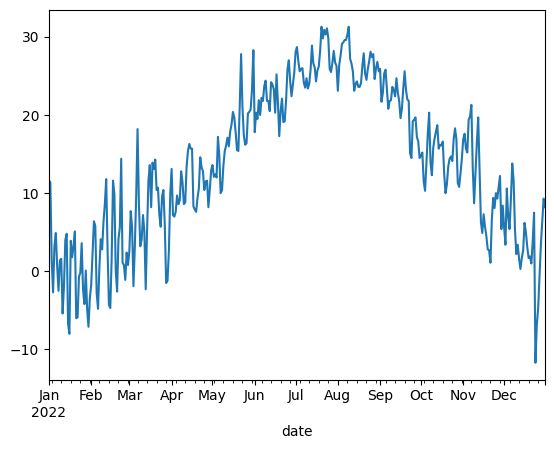

In [31]:
# Create line plot of 2022 temperatures as time series with pandas plotting function

df_temp['avgTemp'].plot()

## Create dual axis line chart of bike trips and temperature

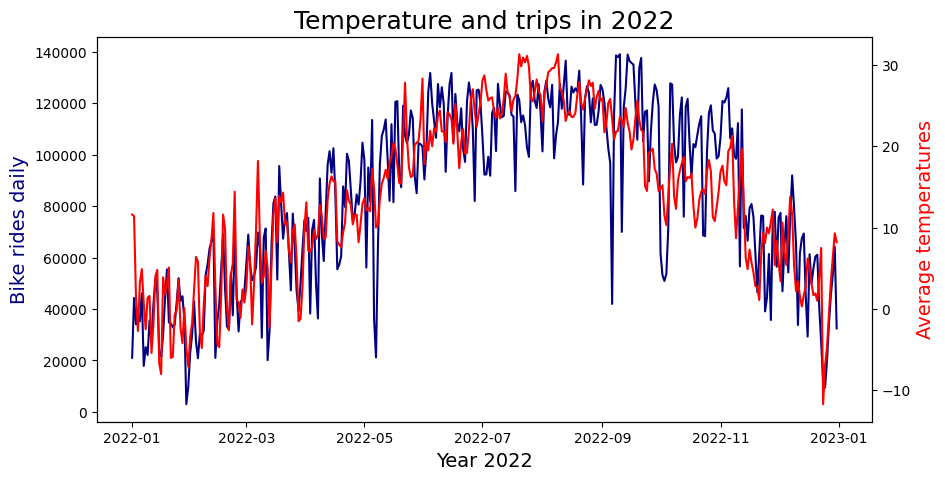

In [33]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['trip_count'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Create dual axis - initialize twin object for two different y-axes on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

#### The paradigm I use is matplotlib's object-oriented (OO) interface. This allows for modification and customization of the figure and axes. 

#### First, with 'plt.subplots()' I create a figure - 'fig' - and a primary axes object - 'ax'. This says where the first plot will go. Next, figsize=(10, 5) specifies the dimensions of the the figure. 

#### 'ax.plot()' draws a line plot of 'trip_count' using the primary 'ax'. 'color="navy"' specifies the color of the line. By default, this is the first line.

#### 'ax.set_xlabel()' and 'ax.set_ylabel()' set the labels for the axes. Color and fontsize are specified here as well. 

#### I create the dual axis with 'twinx()'. This is how 'ax2' shares the same axis as 'ax'.

#### Next I plot the temperature line with 'ax2.plot()'. Its color and fontsize ar specified here. 'ax2.set_ylabel() sets the label of the second y-axis on the right-hand side of the plot.

#### The title is added with 'plt.title()'. Finally, 'plt.show()' renders and displays everything.

## Bonus task

In [34]:
# Calculate trip duration

df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

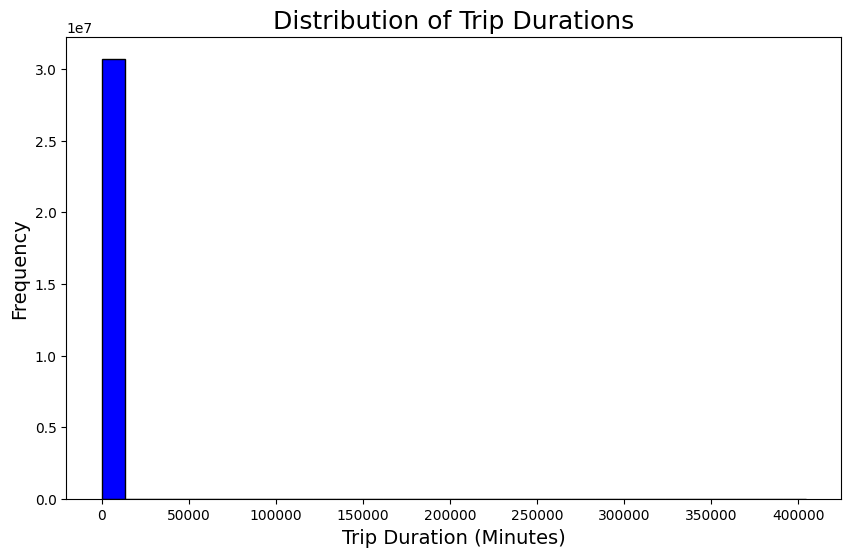

In [36]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['tripduration'], bins=30, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Trip Duration (Minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Trip Durations', fontsize=18)

# Show the plot
plt.show()

In [37]:
df['tripduration'].describe()

count    3.073365e+07
mean     1.819017e+01
std      2.585177e+02
min     -5.728892e+01
25%      5.741000e+00
50%      1.005177e+01
75%      1.785422e+01
max      4.044810e+05
Name: tripduration, dtype: float64

In [38]:
# Remove negative values

df_cleaned = df[df['tripduration'] >= 0]

In [39]:
# Calculate the 99th percentile to remove extreme outliers

upper_limit = df_cleaned['tripduration'].quantile(0.99)

In [40]:
# Filter based on the upper limit

df_cleaned = df_cleaned[df_cleaned['tripduration'] <= upper_limit]

In [41]:
print(f"Filtered upper limit for trip duration: {upper_limit} minutes")
print(df_cleaned['tripduration'].describe())

Filtered upper limit for trip duration: 83.48725866666685 minutes
count    3.042595e+07
mean     1.356876e+01
std      1.167430e+01
min      0.000000e+00
25%      5.703450e+00
50%      9.947567e+00
75%      1.749780e+01
max      8.348723e+01
Name: tripduration, dtype: float64


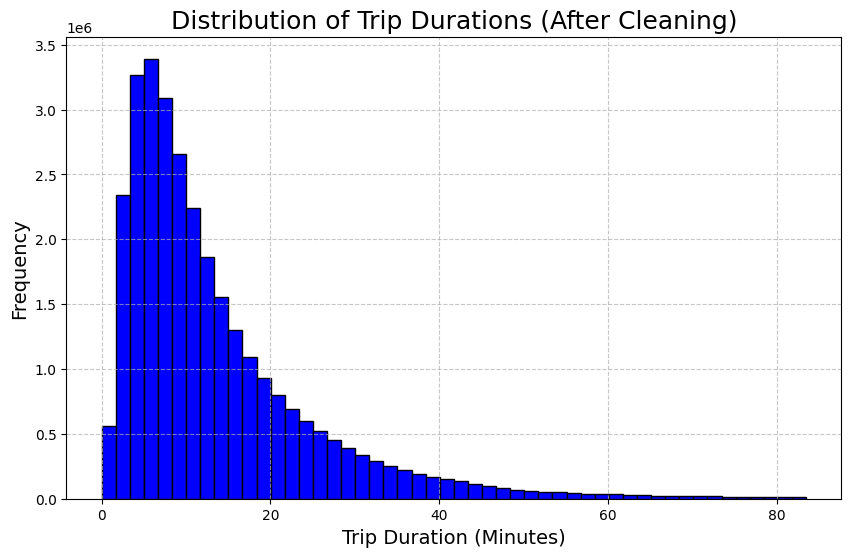

In [42]:
# Plot cleaned histogram

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['tripduration'], bins=50, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Trip Duration (Minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Trip Durations (After Cleaning)', fontsize=18)

# Add grid for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Add a curve following the bins

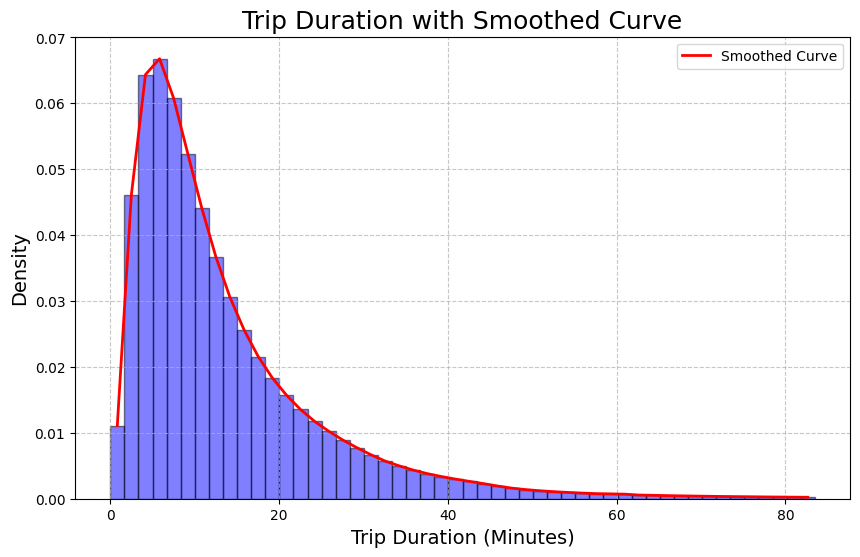

In [44]:
# Plot the histogram
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(df_cleaned['tripduration'], bins=50, color='blue', alpha=0.5, edgecolor='black', density=True)

# Calculate bin centers for smooth plotting
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot the smoothed curve using Matplotlib
plt.plot(bin_centers, counts, color='red', linewidth=2, label='Smoothed Curve')

# Add labels and title
plt.xlabel('Trip Duration (Minutes)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Trip Duration with Smoothed Curve', fontsize=18)
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()